# Working Code
This is a notebook to run the models without messing up the tutorial file. 
##2022/02/04 Adding some OPEs - Adding TEP, TPrP, TiBP, TnBP, TPPO, B4tBPPP. Also re-running with a new prior for some more polar compounds (aA+bB>1.0) where Koa was measured using the GC-RT method - TPrP, TnBP, TPPO, TCiPP, TDCiPP,TmCP, ToCP, TpCP, TBOEP,TEHP, TTBPP, T2iPPP, EHDPP, TDBPP


In [1]:
#Import necessary Python packages
#import uncertainties
import pandas as pd
import pymc3 as pm
import pdb
import os
from IPython.core.interactiveshell import InteractiveShell
#This contains the FAV model set-up and display functions. For more details or for help with variable names/inputs
#etc, look at the function definitions and in-line comments. The "FAV_model_funcs.py" file must be in the same
#folder as this notebook
import FAV_model_funcs as fmf
#Load Data
LDV = pd.read_excel('LDV_Data.xlsx', index_col = 2)
uLDV,FAVs = fmf.loaddata(LDV)
#LEts also bring in the insilico estimation to see what we can see
IDV = pd.read_excel('MDV_Data.xlsx', index_col = 2)
uIDV,IAVs = fmf.loaddata(IDV)
#Display the header column of the uLDV.
#uLDV.head()

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#First, enthalpies. We don't need to worry about LDVs as we just want the final values
#Load the data. I am going to use CDV here as "Combined Derived Values", consisting of LDVs and MDVs
CDV = pd.read_excel('LDVMDV_Data.xlsx', index_col = 2)
uCDV,FAVRs = fmf.loaddata(CDV)
#uCDV.loc[:,'TEP']
#uCDV.loc[['TCEP','TEP'],:]
FAVRs.head()

Class      dUA      dUW      dUO     dUAW     dUOW  \
Compound Name                                                           
cyclopentadecanone  Musk  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
15-pentadecanolide  Musk  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
Musk Ambrette       Musk  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
16-hexadecanolide   Musk  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
Celestolide         Musk  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   

                       dUOA    LogSA    LogSW    LogSO   LogKAW   LogKOW  \
Compound Name                                                              
cyclopentadecanone  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
15-pentadecanolide  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
Musk Ambrette       0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
16-hexadecanolide   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
Celestolide         0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   

                     LogKOA  LogKOWd  
Compound Name                         
cyclopentadecanone  0.0+/-0  0.0+/-0  
15-pentadecanolide  0.0+/-0  0.0+/-0  
Musk Ambrette       0.0+/-0  0.0+/-0  
16-hexadecanolide   0.0+/-0  0.0+/-0  
Celestolide         0.0+/-0  0.0+/-0

In [ ]:
#Define the compounds to calculate. We only need to do the new ones here.

#numUs_absent = 3
comps = uCDV.index
#If you want to run a specific compound/list of compounds, comment out the above line and run the following:
comps = ['TPrP','TPPO']
for comp in comps:
    #pdb.set_trace()
    #For some compounds we can't make an FAV. This will raise a "ValueError", and we will skip that compound.
    try:
        FAVRs, enth_trace = fmf.run_model(comp,FAVRs,model_type ='dU',uDV = uCDV,savepath = 'Traces/FAVRs/dUs/',
                                          trace = 20000, tune=30000,target_accept=0.93)
    except ValueError:
        pass

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [dUOA, dUOW, dUAW, dUO, dUW, dUA, sigma]


In [12]:
#Check the traceplots
directory = 'Traces/FAVRs/dUs/ManyMums/'
InteractiveShell.ast_node_interactivity = 'last_expr'   #"all"
#Loop through all the files in the directory and display plots. You may want to change the directory to a
#sub-folder if you are running lots of compounds. This may take ~minutes for lots of plots
tracesumms = {}
tracesumm = None
#for filename in os.listdir(directory):
uCDV.loc[:,'dUO_absent'] = True
for filename in ['TBOEP_dUs_1215_2259']:
    print(filename)
    #Define the compound from the filename
    #pdb.set_trace()
    comp = filename[0:filename.find("_")]
    if comp == "benzokfluoranthene": #Error from the square brackets in loading files
        comp = "benzo[k]fluoranthene"
    elif comp == "benzoapyrene":
        comp = "benzo[a]pyrene"
    try: 
        fig, tracesumm = fmf.plot_trace(comp,FAVRs,filename=directory+filename,uDV=uCDV,model_type = 'dU',fig=False)
        #Put it in the FAV dataframe at the same time, just in case the kernel was reloaded at some point.
        FAVRs = fmf.trace_to_FAVs(comp,FAVRs,filename = directory+filename,uDV=uCDV,model_type='dU')
        #Print the compound name and the traceplot summary tables
        tracesumms[comp] = tracesumm
    except KeyError:
        #Subfolders in the directory will return a keyerror.
        pass
pdb.set_trace()
tracesummdf = pd.concat(tracesumms,keys = tracesumms.keys());

TBOEP_dUs_1215_2259
--Return--
None
> c:\users\trodge01\appdata\local\temp\ipykernel_17536\2464433781.py(28)<module>()

ipdb> tracesumm
ipdb> q


BdbQuit: 

In [4]:
tracesummdf

mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
TEP  dUA    55.736   5.474  45.603   65.989      0.083    0.060    4312.0   
     dUW   -16.581  13.645 -42.630    8.499      0.220    0.156    3835.0   
     dUAW   72.317  13.262  47.471   97.126      0.178    0.126    5538.0   
     dUOW   11.536  14.701 -15.005   39.840      0.252    0.179    3407.0   
     dUOA  -60.786  10.345 -79.716  -40.524      0.187    0.132    3114.0   
     sigma   0.107   0.062   0.016    0.216      0.001    0.001     753.0   
     dUO    -5.047  11.605 -27.387   16.980      0.224    0.158    2784.0   
TnBP dUA    76.028   3.233  70.092   82.175      0.050    0.036    4157.0   
     dUW   -22.969   4.775 -32.148  -14.203      0.079    0.056    3692.0   
     dUAW   98.998   5.564  88.449  109.312      0.097    0.068    3335.0   
     dUOW   25.046   9.436   7.414   42.476      0.166    0.117    3298.0   
     dUOA  -73.953   9.812 -93.198  -56.382      0.182    0.130    2940.0   
     sigma   0.105   0.063   0.010    0.215      0.002    0.001     695.0   
     dUO     2.075   9.854 -15.901   20.621      0.197    0.139    2550.0   
TPrP dUA    76.575   8.998  60.116   93.659      0.111    0.078    6727.0   
     dUW    -8.823  13.069 -33.905   15.189      0.111    0.079   13770.0   
     dUAW   85.398  12.597  61.891  109.413      0.140    0.099    8170.0   
     dUOW   22.682  14.928  -5.026   51.388      0.209    0.160    5119.0   
     dUOA  -62.718  14.938 -91.432  -34.735      0.157    0.111    9145.0   
     sigma   0.107   0.063   0.009    0.216      0.001    0.001    2057.0   
     dUO    13.859  16.723 -17.983   45.091      0.227    0.230    5685.0   

            ess_tail  r_hat  
TEP  dUA      5699.0   1.00  
     dUW      6364.0   1.00  
     dUAW    10849.0   1.00  
     dUOW    10165.0   1.00  
     dUOA     1309.0   1.00  
     sigma     229.0   1.00  
     dUO      1276.0   1.00  
TnBP dUA      6521.0   1.00  
     dUW      6077.0   1.00  
     dUAW     5483.0   1.00  
     dUOW    11506.0   1.00  
     dUOA     5676.0   1.00  
     sigma     205.0   1.01  
     dUO     13765.0   1.00  
TPrP dUA      6009.0   1.00  
     dUW     28313.0   1.00  
     dUAW     8004.0   1.00  
     dUOW     4207.0   1.00  
     dUOA     3981.0   1.00  
     sigma     726.0   1.00  
     dUO      4083.0   1.00

In [29]:
#Define the compounds to calculate. We only need to do the new ones here.
#numUs_absent = 3
#comps = uCDV.index
#If you want to run a specific compound/list of compounds, comment out the above line and run the following:
#comps = ['TEP','TPrP', 'TiBP', 'TnBP', 'TPPO', 'B4tBPPP']
comps = ['B4tBPPP']
for comp in comps:
    #pdb.set_trace()
    #For some compounds we can't make an FAV. This will raise a "ValueError", and we will skip that compound.
    try:
        FAVRs, enth_trace = fmf.run_model(comp,FAVRs,model_type ='KS',uDV = uCDV,savepath = 'Traces/FAVRs/KS/',
                                          trace = 20000, tune=20000,target_accept=0.9)
    except ValueError:
        pass

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 10_000 draw iterations (100_000 + 50_000 draws total) took 213 seconds.
The acceptance probability does not match the target. It is 0.8301850583780943, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


In [13]:
#Check the traceplots
directory = 'Traces/FAVRs/KS/ManyMums/'
#InteractiveShell.ast_node_interactivity = "all"
#Loop through all the files in the directory and display plots. You may want to change the directory to a
#sub-folder if you are running lots of compounds. This may take ~minutes for lots of plots
tracesumms = {}
for filename in os.listdir(directory):
    #Define the compound from the filename
    #pdb.set_trace()
    comp = filename[0:filename.find("_")]    
    if comp == "benzokfluoranthene": #Error from the square brackets in loading files
        comp = "benzo[k]fluoranthene"
    elif comp == "benzoapyrene":
        comp = "benzo[a]pyrene"
    try: 
        #pdb.set_trace()
        fig, tracesumm = fmf.plot_trace(comp,FAVRs,filename=directory+filename,uDV=uCDV,model_type = 'KS',fig=False)
        #Put it in the FAV dataframe at the same time, just in case the kernel was reloaded at some point.
        FAVRs = fmf.trace_to_FAVs(comp,FAVRs,filename = directory+filename,uDV=uCDV,model_type='KS')
        #Print the compound name and the traceplot summary tables
        #comp       
        tracesumms[comp] = tracesumm
    except KeyError:
        #Subfolders in the directory will return a keyerror.
        pass
tracesummdf = pd.concat(tracesumms,keys = tracesumms.keys());

In [14]:
#Now, we are going to work on the compounds where aA+bB>1.0, and therefore we need to discount the GC-RT results
#Display the originals
#comps = ['TEP', 'TPrP', 'TnBP','TCEP','TCiPP','TPhP','TmCP','TBOEP', 'TDCiPP','TEHP']
comps = FAVRs.loc[FAVRs.loc[:,'LogSA']!=0,:].index
FAVRs.loc[comps,:]

Class         dUA       dUW      dUO     dUAW     dUOW  \
Compound Name                                                          
TEP             OPE      56+/-5  -17+/-14  -5+/-12  72+/-13  12+/-15   
TPrP            OPE      77+/-9   -9+/-13  14+/-17  85+/-13  23+/-15   
TnBP            OPE  76.0+/-3.2   -23+/-5   2+/-10   99+/-6   25+/-9   
TCEP            OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TCiPP           OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TDCiPP          OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TPhP            OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TmCP            OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TBOEP           OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TEHP            OPE     0.0+/-0   0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   

                   dUOA         LogSA         LogSW        LogSO  \
Compound Name                                                      
TEP            -61+/-10  -1.74+/-0.22     2.8+/-0.5    3.6+/-0.4   
TPrP           -63+/-15    -4.1+/-0.7    -0.5+/-0.7    1.9+/-0.9   
TnBP           -74+/-10  -4.16+/-0.22   0.06+/-0.14  3.83+/-0.23   
TCEP            0.0+/-0  -4.86+/-0.15   1.42+/-0.10  2.99+/-0.16   
TCiPP           0.0+/-0    -5.6+/-0.7   0.57+/-0.08  3.08+/-0.13   
TDCiPP          0.0+/-0    -8.0+/-0.5  -1.43+/-0.22  2.21+/-0.24   
TPhP            0.0+/-0  -7.37+/-0.35  -2.33+/-0.18    2.8+/-0.4   
TmCP            0.0+/-0    -8.9+/-0.4    -3.2+/-1.3    2.3+/-0.4   
TBOEP           0.0+/-0  -7.92+/-0.25   0.20+/-0.19    3.8+/-0.4   
TEHP            0.0+/-0  -8.07+/-0.28    -1.6+/-1.0    3.2+/-0.8   

                     LogKAW   LogKOW        LogKOA      LogKOWd  
Compound Name                                                    
TEP              -4.5+/-0.5  0.0+/-0     5.3+/-0.4    0.8+/-0.4  
TPrP             -3.6+/-0.8  0.0+/-0     5.9+/-1.0    2.4+/-0.8  
TnBP           -4.21+/-0.25  0.0+/-0   7.98+/-0.26  3.78+/-0.20  
TCEP           -6.29+/-0.19  0.0+/-0   7.88+/-0.10  1.56+/-0.15  
TCiPP            -6.2+/-0.7  0.0+/-0     8.7+/-0.7  2.52+/-0.07  
TDCiPP           -6.6+/-0.5  0.0+/-0    10.2+/-0.5  3.63+/-0.08  
TPhP             -5.0+/-0.4  0.0+/-0  10.14+/-0.18    5.1+/-0.4  
TmCP             -5.7+/-1.3  0.0+/-0    11.1+/-0.4    5.5+/-1.3  
TBOEP          -8.11+/-0.32  0.0+/-0    11.7+/-0.5    3.6+/-0.4  
TEHP             -6.5+/-1.0  0.0+/-0    11.3+/-0.8    4.8+/-0.7

In [16]:
fmf.export_FAVs(FAVRs,savename = 'ManyMums_FAVRs')

dUA  dUA_SD  dUW  dUW_SD  dUO  dUO_SD  dUAW  dUAW_SD  \
Compound Name                                                                   
cyclopentadecanone       0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
15-pentadecanolide       0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
Musk Ambrette            0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
16-hexadecanolide        0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
Celestolide              0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
...                      ...     ...  ...     ...  ...     ...   ...      ...   
Homosolate               0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
Octocrylene              0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
2-ethylhexyl salicylate  0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
Avobenzone               0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   
Octinoxate               0.0     0.0  0.0     0.0  0.0     0.0   0.0      0.0   

                         dUOW  dUOW_SD  ...  LogSW  LogSW_SD  LogSO  LogSO_SD  \
Compound Name                           ...                                     
cyclopentadecanone        0.0      0.0  ...    0.0       0.0    0.0       0.0   
15-pentadecanolide        0.0      0.0  ...    0.0       0.0    0.0       0.0   
Musk Ambrette             0.0      0.0  ...    0.0       0.0    0.0       0.0   
16-hexadecanolide         0.0      0.0  ...    0.0       0.0    0.0       0.0   
Celestolide               0.0      0.0  ...    0.0       0.0    0.0       0.0   
...                       ...      ...  ...    ...       ...    ...       ...   
Homosolate                0.0      0.0  ...    0.0       0.0    0.0       0.0   
Octocrylene               0.0      0.0  ...    0.0       0.0    0.0       0.0   
2-ethylhexyl salicylate   0.0      0.0  ...    0.0       0.0    0.0       0.0   
Avobenzone                0.0      0.0  ...    0.0       0.0    0.0       0.0   
Octinoxate                0.0      0.0  ...    0.0       0.0    0.0       0.0   

                         LogKAW  LogKAW_SD  LogKOWd  LogKOWd_SD  LogKOA  \
Compound Name                                                             
cyclopentadecanone          0.0        0.0      0.0         0.0     0.0   
15-pentadecanolide          0.0        0.0      0.0         0.0     0.0   
Musk Ambrette               0.0        0.0      0.0         0.0     0.0   
16-hexadecanolide           0.0        0.0      0.0         0.0     0.0   
Celestolide                 0.0        0.0      0.0         0.0     0.0   
...                         ...        ...      ...         ...     ...   
Homosolate                  0.0        0.0      0.0         0.0     0.0   
Octocrylene                 0.0        0.0      0.0         0.0     0.0   
2-ethylhexyl salicylate     0.0        0.0      0.0         0.0     0.0   
Avobenzone                  0.0        0.0      0.0         0.0     0.0   
Octinoxate                  0.0        0.0      0.0         0.0     0.0   

                         LogKOA_SD  
Compound Name                       
cyclopentadecanone             0.0  
15-pentadecanolide             0.0  
Musk Ambrette                  0.0  
16-hexadecanolide              0.0  
Celestolide                    0.0  
...                            ...  
Homosolate                     0.0  
Octocrylene                    0.0  
2-ethylhexyl salicylate        0.0  
Avobenzone                     0.0  
Octinoxate                     0.0  

[80 rows x 24 columns]

In [10]:
#Look at the adjustments
#comps = FAVRs.loc[FAVRs.loc[:,'LogSA']!=0,:].index
KSnames = ['LogSA','LogSW','LogSO','LogKAW','LogKOWd','LogKOA']
for prop in KSnames:
    FAVRs.loc[comps,'e_'+prop] = uCDV.loc[comps,prop]-FAVRs.loc[comps,prop] 
#Display
FAVRs.loc[comps,'e_LogSA':'e_LogKOA']

e_LogSA       e_LogSW     e_LogSO    e_LogKAW  \
Compound Name                                                       
TnBP           -0.34+/-0.33   0.11+/-0.17  -0.0+/-0.7   0.9+/-0.9   
TPPO              0.3+/-0.9     0.1+/-0.5  -1.2+/-0.6   0.4+/-2.3   
TCiPP            -0.0+/-1.0   0.01+/-0.12  -0.2+/-0.5   0.4+/-1.7   
TDCiPP            0.6+/-0.9  -0.07+/-0.33   0.2+/-0.5  -0.5+/-2.0   
TmCP              0.4+/-0.8    -0.2+/-3.2  -0.2+/-0.5  -0.1+/-2.1   
ToCP              0.2+/-0.5    -0.0+/-0.9  -0.9+/-0.6  -0.2+/-1.7   
TpCP              0.3+/-0.7    -0.3+/-1.4  -0.5+/-0.6  -0.5+/-1.8   
TBOEP            -0.1+/-0.4   0.05+/-0.24  -0.2+/-0.7  -1.3+/-2.7   
TEHP              0.0+/-0.4    -2.9+/-2.7   1.9+/-1.1   3.8+/-1.1   
T2iPPP          0.01+/-0.26        -1+/-5  -0.2+/-0.6  -0.1+/-1.9   
EHDPP           0.06+/-0.30    -0.0+/-1.1  -0.3+/-0.6  -0.7+/-1.8   

                  e_LogKOWd      e_LogKOA  
Compound Name                              
TnBP            0.19+/-0.19  -0.19+/-0.21  
TPPO              0.0+/-0.5     0.3+/-0.6  
TCiPP           0.00+/-0.10     0.1+/-1.1  
TDCiPP         -0.01+/-0.10     0.1+/-0.5  
TmCP             -0.0+/-3.5     0.1+/-0.4  
ToCP              0.3+/-3.3     0.2+/-0.5  
TpCP             -0.6+/-3.4     0.1+/-0.4  
TBOEP             0.5+/-0.7    -0.3+/-0.6  
TEHP             -0.4+/-1.0     0.2+/-0.8  
T2iPPP               -0+/-4   0.02+/-0.33  
EHDPP             0.1+/-0.8     0.2+/-0.6

In [15]:
#comps = ['TnBP', 'TPPO', 'TCiPP', 'TDCiPP','TmCP', 'ToCP', 'TpCP', 'TBOEP','TEHP', 'TTBPP', 'T2iPPP', 'EHDPP', 'TDBPP']
#Define the compounds to calculate. 
#comps = ['TnBP','TPPO', 'TCiPP', 'TDCiPP','TmCP', 'ToCP', 'TpCP','TBOEP','TEHP', 'T2iPPP', 'EHDPP']
comps = ['TBOEP']
for comp in comps:
    #pdb.set_trace()
    #For some compounds we can't make an FAV. This will raise a "ValueError", and we will skip that compound.
    try:
        FAVRs, enth_trace = fmf.run_model(comp,FAVRs,model_type ='KS',uDV = uCDV,savepath = 'Traces/FAVRs/KS/',
                                          trace = 20000, tune=30000,target_accept=0.9,cores=10,LogKOA='SkewNormal')
    except ValueError:
        pass

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 30_000 tune and 20_000 draw iterations (150_000 + 100_000 draws total) took 234 seconds.
The number of effective samples is smaller than 10% for some parameters.


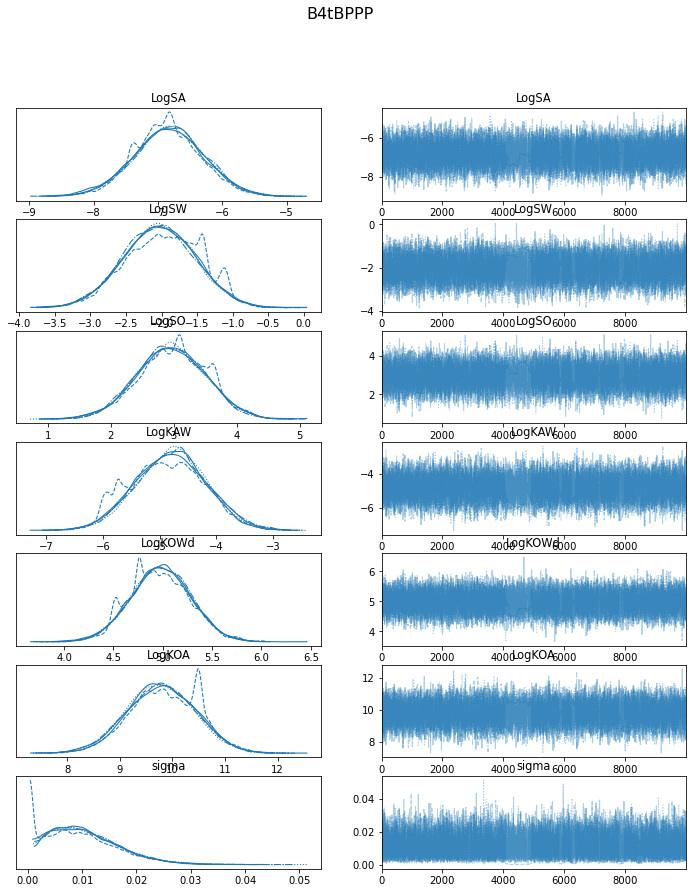

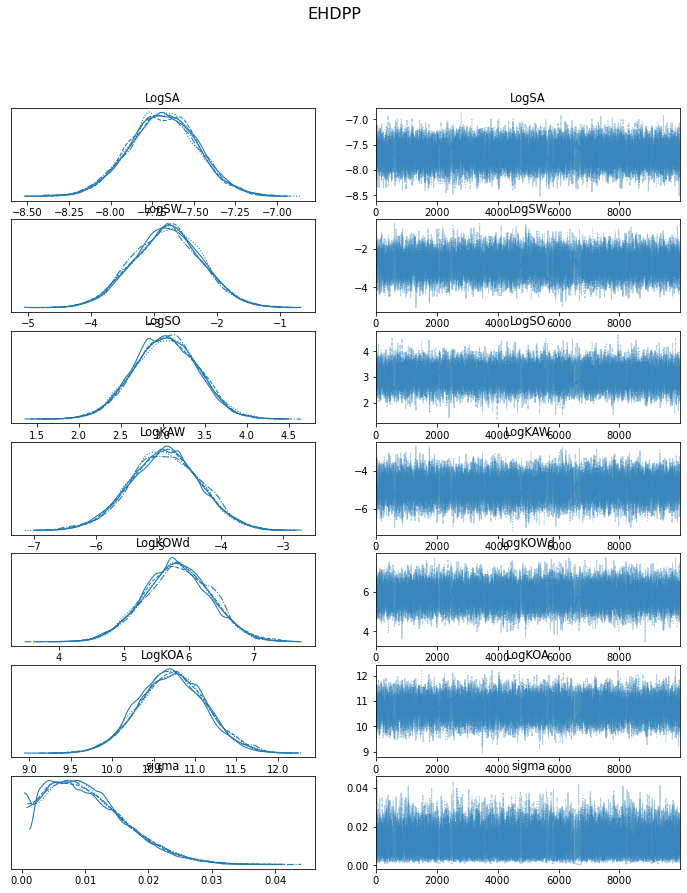

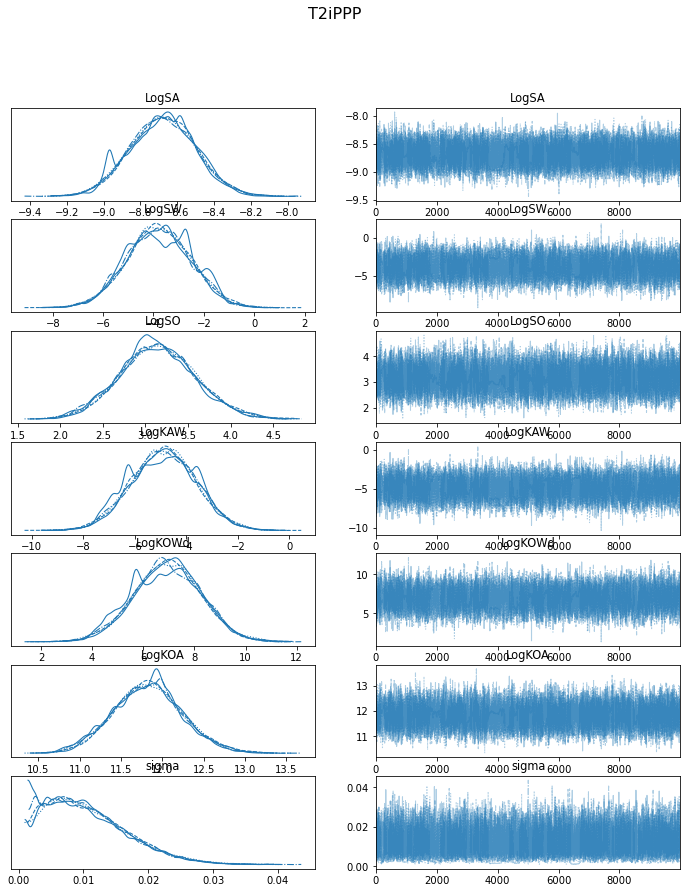

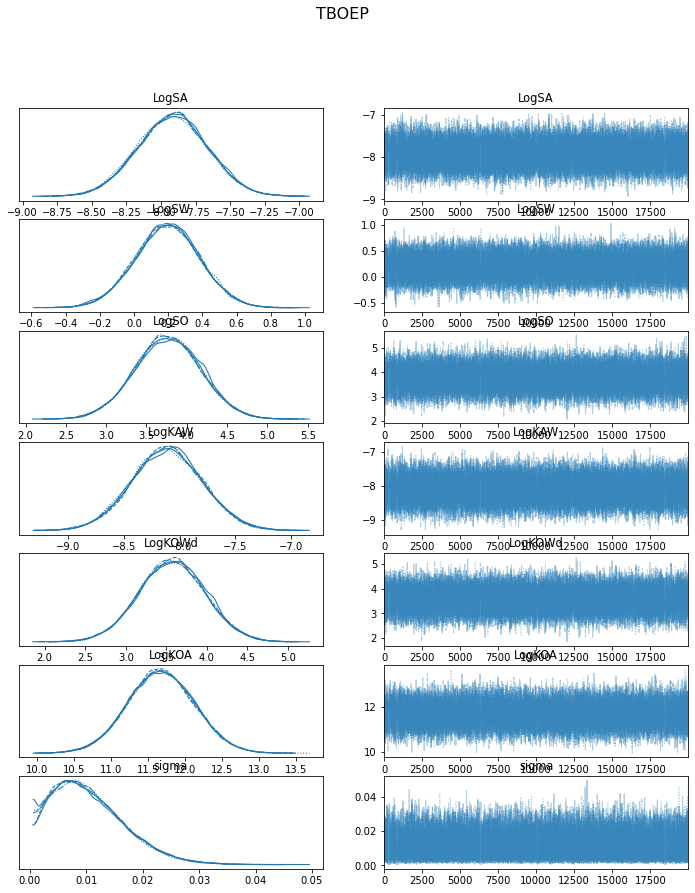

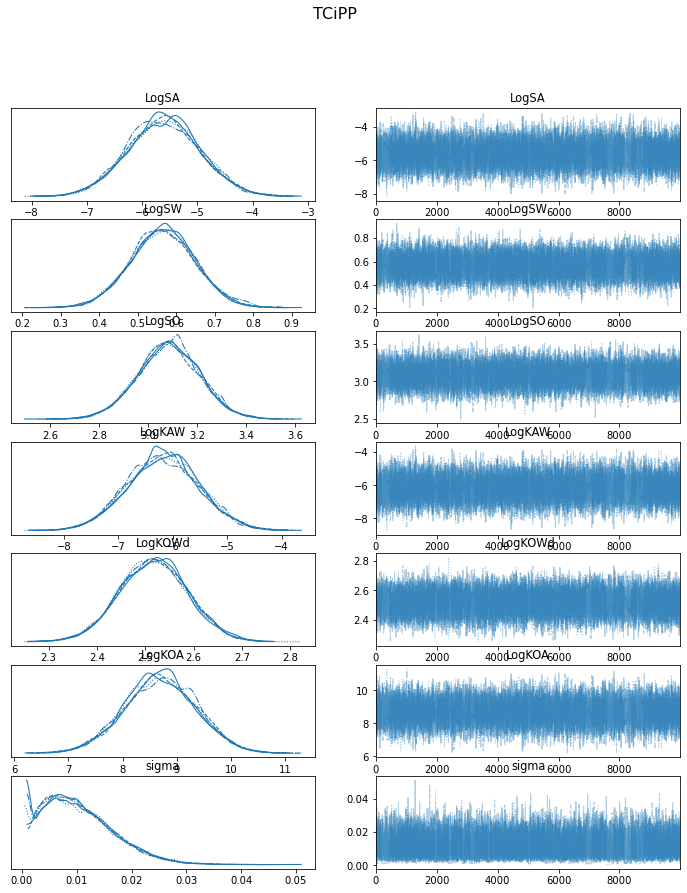

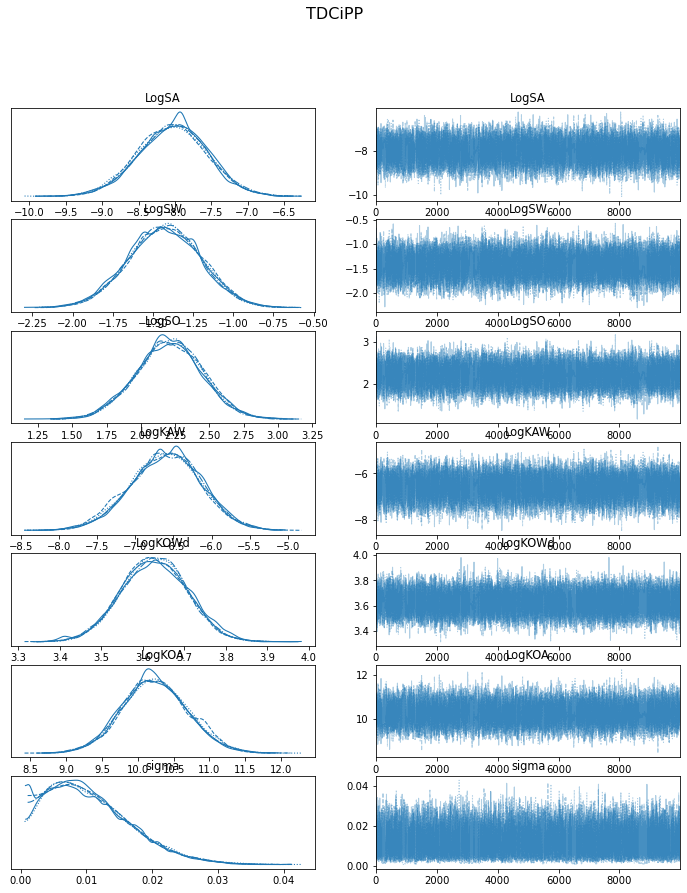

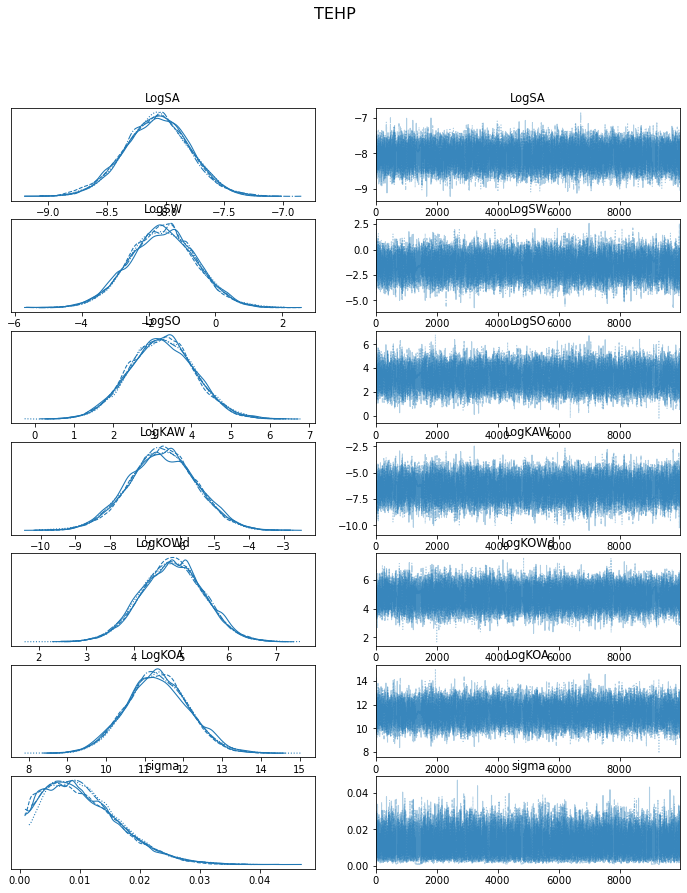

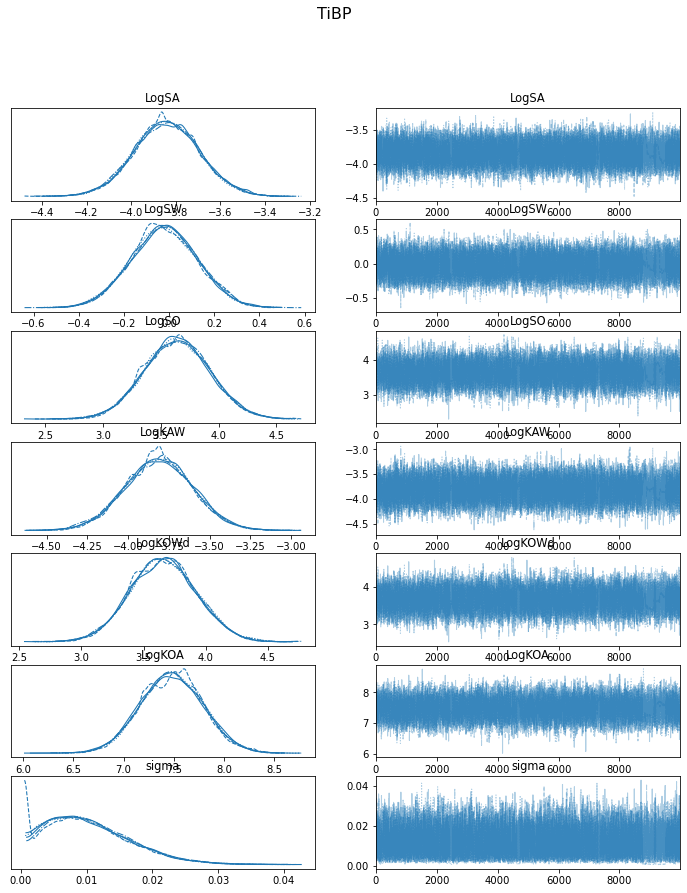

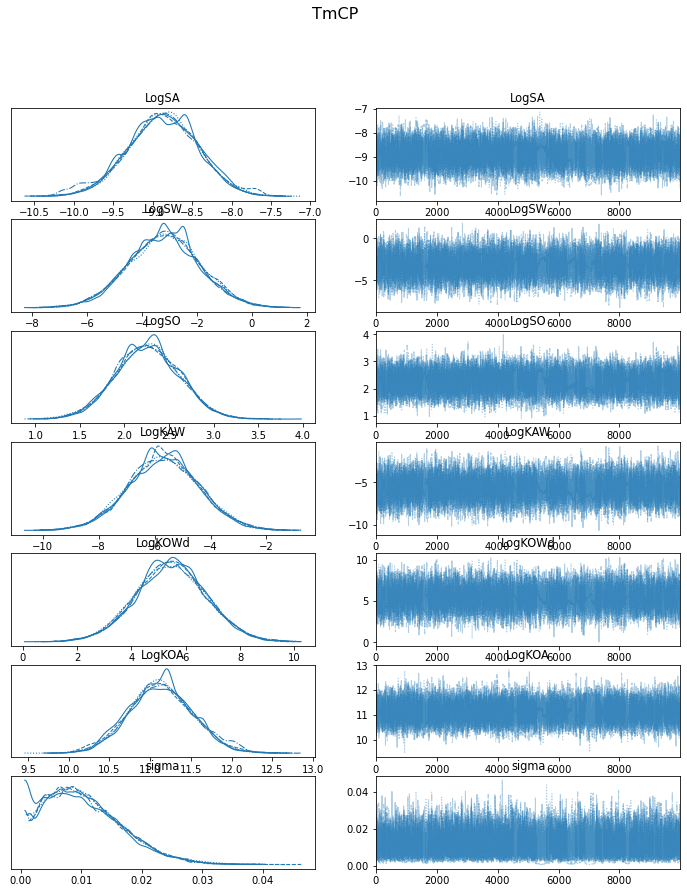

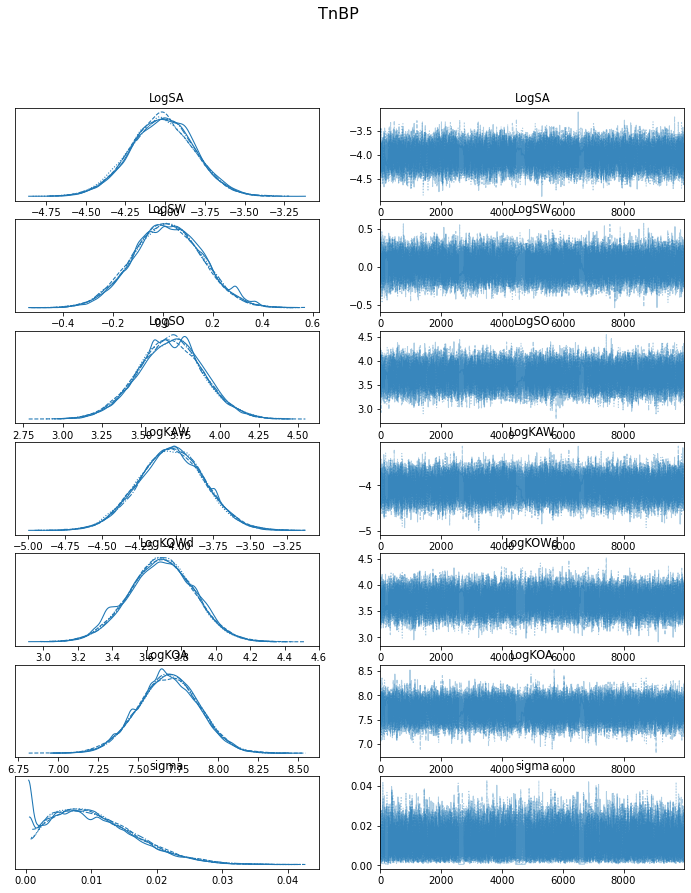

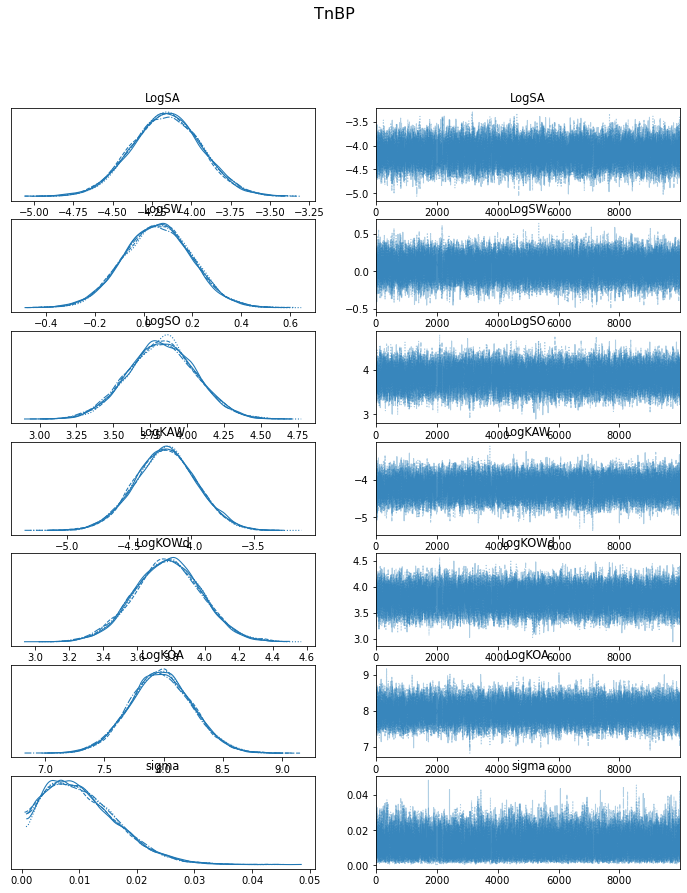

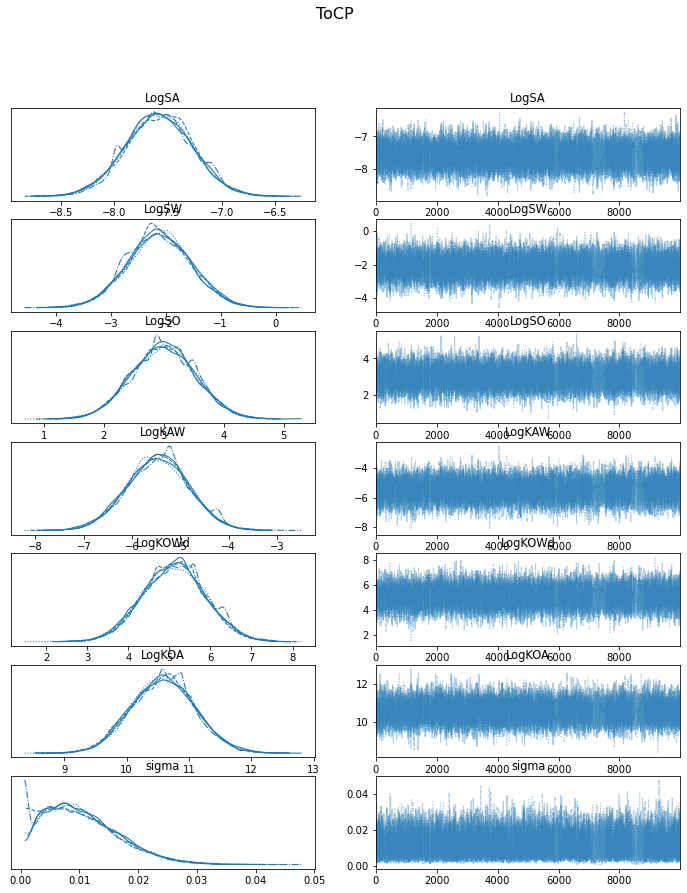

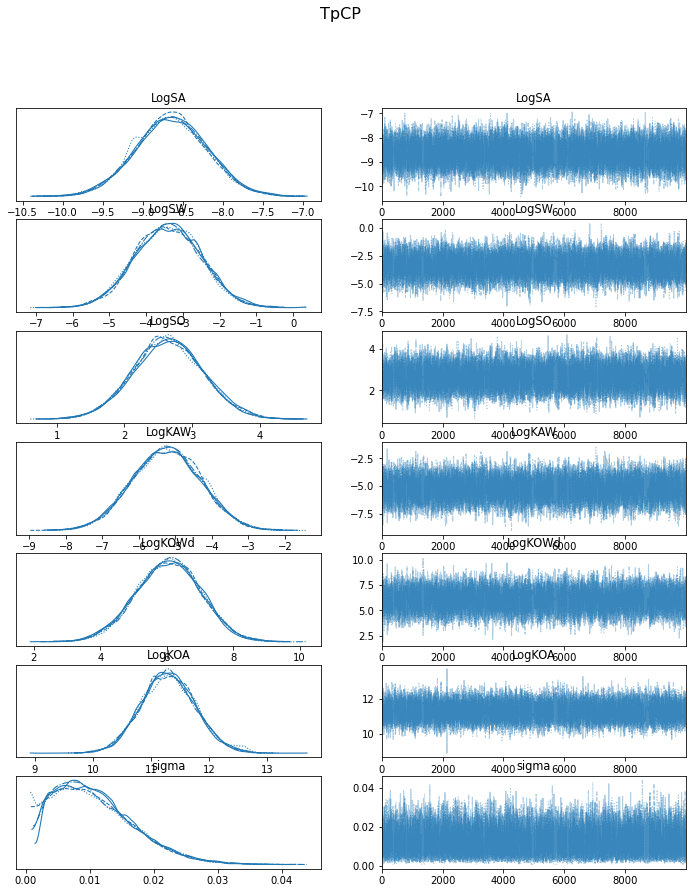

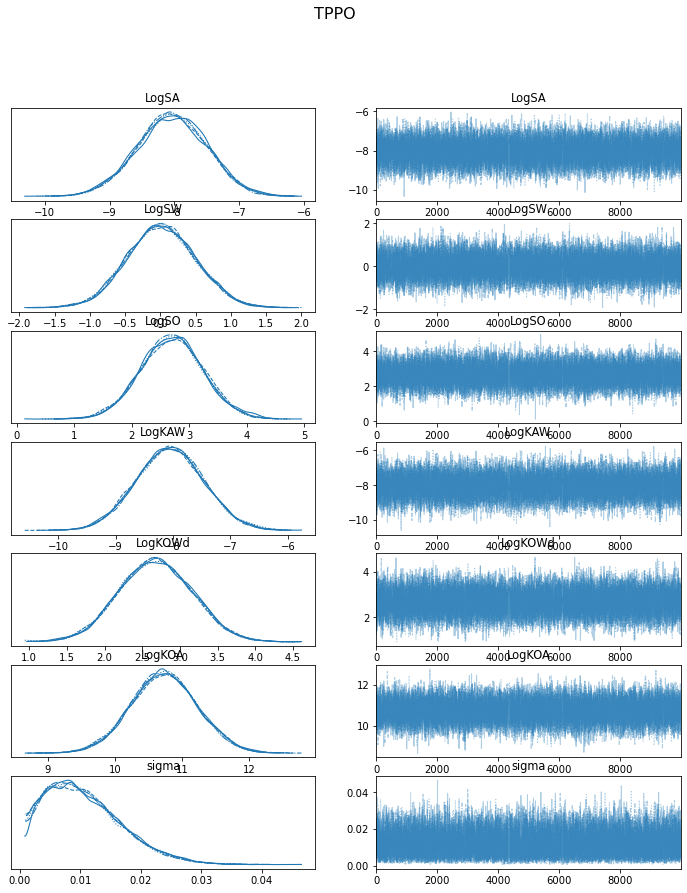

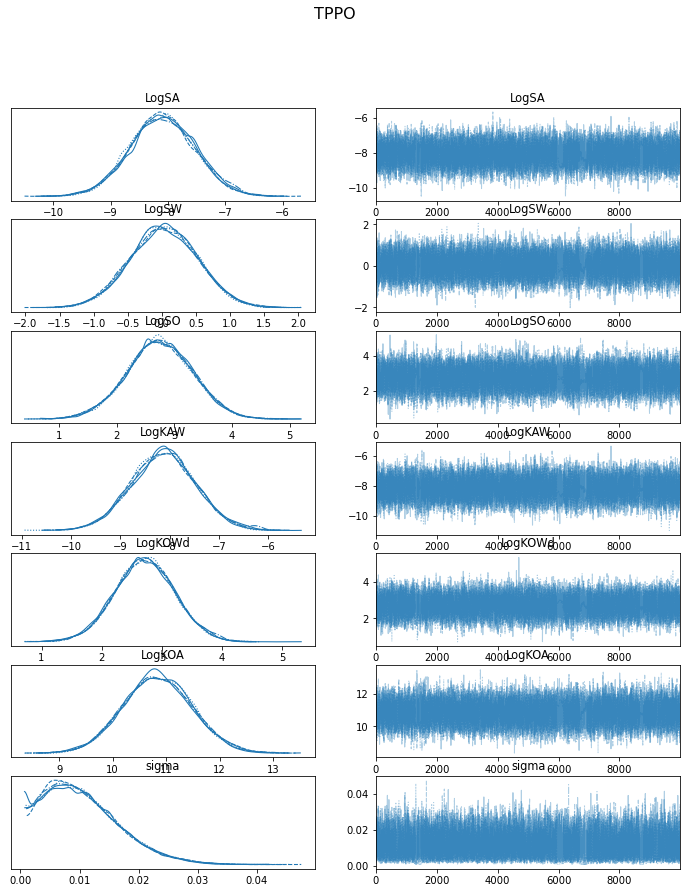

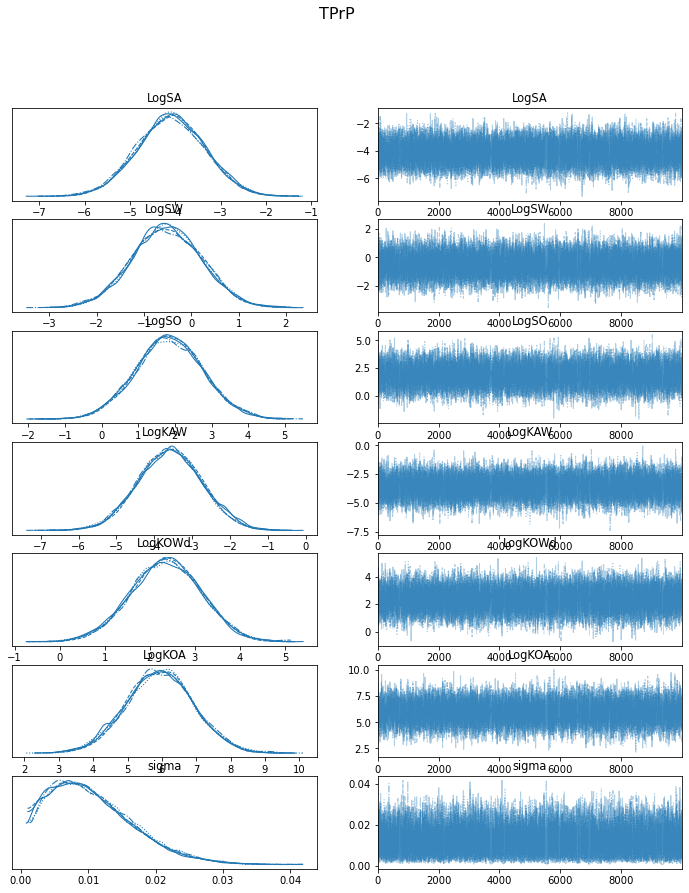

In [14]:
#Check the traceplots
directory = 'Traces/FAVRs/KS/LoopDir/'
InteractiveShell.ast_node_interactivity = "all"
#Loop through all the files in the directory and display plots. You may want to change the directory to a
#sub-folder if you are running lots of compounds. This may take ~minutes for lots of plots
tracesumms = {}
for filename in os.listdir(directory):
    #Define the compound from the filename
    #pdb.set_trace()
    comp = filename[0:filename.find("_")]    
    if comp == "benzokfluoranthene": #Error from the square brackets in loading files
        comp = "benzo[k]fluoranthene"
    elif comp == "benzoapyrene":
        comp = "benzo[a]pyrene"
    try: 
        #pdb.set_trace()
        fig, tracesumm = fmf.plot_trace(comp,FAVRs,filename=directory+filename,uDV=uCDV,model_type = 'KS',fig=True)
        #Put it in the FAV dataframe at the same time, just in case the kernel was reloaded at some point.
        FAVRs = fmf.trace_to_FAVs(comp,FAVRs,filename = directory+filename,uDV=uCDV,model_type='KS')
        #Print the compound name and the traceplot summary tables
        #comp       
        tracesumms[comp] = tracesumm
    except KeyError:
        #Subfolders in the directory will return a keyerror.
        pass
tracesummdf = pd.concat(tracesumms,keys = tracesumms.keys());
#tracesummdf
#comps = ['TPPO', 'TpCP','TEHP', 'T2iPPP']

In [8]:
#InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 77)
tracesummdf

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
EHDPP  LogSA    -7.685  0.206  -8.074   -7.295      0.002    0.002    8655.0   
       LogSW    -2.788  0.551  -3.814   -1.754      0.006    0.004    9232.0   
       LogSO     3.035  0.383   2.319    3.740      0.004    0.003    7418.0   
       LogKAW   -4.898  0.568  -5.956   -3.820      0.006    0.004    9364.0   
       LogKOWd   5.824  0.518   4.847    6.789      0.006    0.004    8502.0   
       LogKOA   10.725  0.405   9.972   11.499      0.005    0.004    6368.0   
       sigma     0.010  0.006   0.001    0.022      0.000    0.000    2053.0   
T2iPPP LogSA    -8.679  0.179  -9.014   -8.347      0.003    0.002    3365.0   
       LogSW    -3.787  1.274  -6.118   -1.406      0.027    0.019    2311.0   
       LogSO     3.146  0.445   2.313    4.001      0.007    0.005    4566.0   
       LogKAW   -4.893  1.266  -7.322   -2.607      0.028    0.022    2056.0   
       LogKOWd   6.932  1.320   4.422    9.364      0.029    0.020    2118.0   
       LogKOA   11.827  0.417  11.045   12.622      0.007    0.005    3858.0   
       sigma     0.011  0.006   0.001    0.022      0.000    0.000     800.0   
TBOEP  LogSA    -7.916  0.254  -8.399   -7.444      0.001    0.001   29026.0   
       LogSW     0.195  0.188  -0.160    0.547      0.001    0.001   35434.0   
       LogSO     3.762  0.410   2.966    4.517      0.003    0.002   23405.0   
       LogKAW   -8.113  0.317  -8.703   -7.511      0.002    0.001   26910.0   
       LogKOWd   3.571  0.409   2.789    4.330      0.002    0.002   27048.0   
       LogKOA   11.677  0.450  10.829   12.519      0.003    0.002   22780.0   
       sigma     0.010  0.006   0.001    0.022      0.000    0.000    5874.0   
TCiPP  LogSA    -5.607  0.655  -6.834   -4.376      0.009    0.006    5886.0   
       LogSW     0.566  0.084   0.405    0.723      0.001    0.001    5817.0   
       LogSO     3.082  0.126   2.839    3.314      0.001    0.001    8393.0   
       LogKAW   -6.172  0.659  -7.386   -4.913      0.009    0.006    5645.0   
       LogKOWd   2.517  0.071   2.382    2.647      0.001    0.001    7095.0   
       LogKOA    8.691  0.662   7.435    9.926      0.009    0.006    5904.0   
       sigma     0.010  0.006   0.001    0.022      0.000    0.000    1288.0   
TDCiPP LogSA    -8.030  0.474  -8.937   -7.151      0.005    0.003   11138.0   
       LogSW    -1.428  0.225  -1.835   -0.994      0.002    0.002    8865.0   
       LogSO     2.207  0.241   1.762    2.669      0.002    0.002   11699.0   
       LogKAW   -6.603  0.467  -7.483   -5.732      0.005    0.004    8326.0   
       LogKOWd   3.628  0.079   3.482    3.778      0.001    0.001    6080.0   
       LogKOA   10.242  0.457   9.374   11.095      0.005    0.004    8518.0   
       sigma     0.010  0.006   0.001    0.022      0.000    0.000    1829.0   
TEHP   LogSA    -8.073  0.277  -8.592   -7.547      0.003    0.002    7620.0   
       LogSW    -1.579  1.000  -3.409    0.350      0.011    0.008    8539.0   
       LogSO     3.247  0.837   1.670    4.817      0.010    0.007    7073.0   
       LogKAW   -6.493  0.977  -8.347   -4.675      0.010    0.007    8698.0   
       LogKOWd   4.822  0.659   3.577    6.043      0.006    0.004   13123.0   
       LogKOA   11.322  0.802   9.813   12.825      0.010    0.007    6876.0   
       sigma     0.011  0.006   0.001    0.022      0.000    0.000    2565.0   
TmCP   LogSA    -8.870  0.450  -9.722   -8.019      0.009    0.007    2478.0   
       LogSW    -3.197  1.308  -5.596   -0.647      0.014    0.010    8630.0   
       LogSO     2.258  0.360   1.597    2.947      0.004    0.003    9248.0   
       LogKAW   -5.673  1.283  -8.087   -3.248      0.014    0.010    8674.0   
       LogKOWd   5.456  1.304   3.063    8.000      0.014    0.010    8943.0   
       LogKOA   11.133  0.394  10.374   11.858      0.006    0.005    3864.0   
       sigma     0.011  0.006   0.001    0.022      0.000    0.000    1035.0   
TnBP   LogSA    -4

In [13]:
comps = ['TnBP','TPPO', 'TCiPP', 'TDCiPP','TmCP', 'ToCP', 'TpCP','TBOEP','TEHP', 'T2iPPP', 'EHDPP']
#uCDV.loc[comps,'LogKOA':'LogKOWd']
FAVRs.loc[comps,:]

Class      dUA      dUW      dUO     dUAW     dUOW     dUOA  \
Compound Name                                                               
TnBP            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TPPO            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TCiPP           OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TDCiPP          OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TmCP            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
ToCP            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TpCP            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TBOEP           OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
TEHP            OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
T2iPPP          OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   
EHDPP           OPE  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0  0.0+/-0   

                      LogSA         LogSW        LogSO        LogKAW   LogKOW  \
Compound Name                                                                   
TnBP           -4.16+/-0.22   0.06+/-0.14  3.83+/-0.23  -4.21+/-0.25  0.0+/-0   
TPPO             -8.1+/-0.6     0.0+/-0.5    2.7+/-0.6    -8.1+/-0.7  0.0+/-0   
TCiPP            -5.6+/-0.7   0.57+/-0.08  3.08+/-0.13    -6.2+/-0.7  0.0+/-0   
TDCiPP           -8.0+/-0.5  -1.43+/-0.22  2.21+/-0.24    -6.6+/-0.5  0.0+/-0   
TmCP             -8.9+/-0.4    -3.2+/-1.3    2.3+/-0.4    -5.7+/-1.3  0.0+/-0   
ToCP           -7.58+/-0.31    -2.1+/-0.6    3.0+/-0.5    -5.5+/-0.6  0.0+/-0   
TpCP             -8.6+/-0.4    -3.4+/-0.9    2.6+/-0.5    -5.2+/-0.9  0.0+/-0   
TBOEP          -7.92+/-0.25   0.20+/-0.19    3.8+/-0.4  -8.11+/-0.32  0.0+/-0   
TEHP           -8.07+/-0.28    -1.6+/-1.0    3.2+/-0.8    -6.5+/-1.0  0.0+/-0   
T2iPPP         -8.68+/-0.18    -3.8+/-1.3    3.1+/-0.4    -4.9+/-1.3  0.0+/-0   
EHDPP          -7.68+/-0.21    -2.8+/-0.6    3.0+/-0.4    -4.9+/-0.6  0.0+/-0   

                    LogKOA      LogKOWd       e_LogSA       e_LogSW  \
Compound Name                                                         
TnBP           7.98+/-0.26  3.78+/-0.20  -0.21+/-0.34   0.07+/-0.17   
TPPO            10.8+/-0.6    2.7+/-0.5     0.4+/-0.9     0.0+/-0.5   
TCiPP            8.7+/-0.7  2.52+/-0.07     0.1+/-1.1   0.00+/-0.12   
TDCiPP          10.2+/-0.5  3.63+/-0.08     0.7+/-0.9  -0.09+/-0.33   
TmCP            11.1+/-0.4    5.5+/-1.3     0.5+/-0.8    -0.1+/-3.2   
ToCP            10.6+/-0.5    5.1+/-0.8     0.2+/-0.5    -0.0+/-0.9   
TpCP            11.3+/-0.5    6.0+/-1.0     0.4+/-0.7    -0.3+/-1.4   
TBOEP           11.7+/-0.5    3.6+/-0.4    -0.0+/-0.4   0.03+/-0.24   
TEHP            11.3+/-0.8    4.8+/-0.7     0.0+/-0.4    -3.1+/-2.8   
T2iPPP          11.8+/-0.4    6.9+/-1.3   0.01+/-0.26        -1+/-5   
EHDPP           10.7+/-0.4    5.8+/-0.5   0.07+/-0.30    -0.0+/-1.1   

                  e_LogSO    e_LogKAW     e_LogKOWd      e_LogKOA  
Compound Name                                                      
TnBP           -0.2+/-0.7   1.0+/-0.9   0.10+/-0.20  -0.48+/-0.28  
TPPO           -1.2+/-0.6   0.5+/-2.3    -0.0+/-0.5     0.2+/-0.7  
TCiPP          -0.2+/-0.5   0.6+/-1.7   0.00+/-0.10    -0.1+/-1.1  
TDCiPP          0.2+/-0.5  -0.4+/-2.0  -0.01+/-0.10    -0.0+/-0.6  
TmCP           -0.2+/-0.5   0.0+/-2.1    -0.1+/-3.5    -0.1+/-0.5  
ToCP           -0.9+/-0.7  -0.2+/-1.7     0.3+/-3.3     0.1+/-0.6  
TpCP           -0.6+/-0.6  -0.4+/-1.9    -0.7+/-3.4     0.0+/-0.6  
TBOEP          -0.4+/-0.7  -1.2+/-2.7     0.3+/-0.7    -0.6+/-0.7  
TEHP            1.6+/-1.2   4.1+/-1.2    -0.4+/-1.0    -0.1+/-1.0  
T2iPPP         -0.4+/-0.7  -0.0+/-1.9        -0+/-4    -0.2+/-0.5  
EHDPP          -0.3+/-0.6  -0.6+/-1.8     0.1+/-0.8     0.2+/-0.6

In [12]:
#Look at the adjustments
comps = comps #FAVRs.loc[FAVRs.loc[:,'LogSA']!=0,:].index
KSnames = ['LogSA','LogSW','LogSO','LogKAW','LogKOWd','LogKOA']
for prop in KSnames:
    FAVRs.loc[comps,'e_'+prop] = uCDV.loc[comps,prop]-FAVRs.loc[comps,prop] 
#Display
FAVRs.loc[comps,'e_LogSA':'e_LogKOA']
#FAVRs.loc[comps,:]

e_LogSA       e_LogSW     e_LogSO    e_LogKAW  \
Compound Name                                                       
TnBP           -0.21+/-0.34   0.07+/-0.17  -0.2+/-0.7   1.0+/-0.9   
TPPO              0.4+/-0.9     0.0+/-0.5  -1.2+/-0.6   0.5+/-2.3   
TCiPP             0.1+/-1.1   0.00+/-0.12  -0.2+/-0.5   0.6+/-1.7   
TDCiPP            0.7+/-0.9  -0.09+/-0.33   0.2+/-0.5  -0.4+/-2.0   
TmCP              0.5+/-0.8    -0.1+/-3.2  -0.2+/-0.5   0.0+/-2.1   
ToCP              0.2+/-0.5    -0.0+/-0.9  -0.9+/-0.7  -0.2+/-1.7   
TpCP              0.4+/-0.7    -0.3+/-1.4  -0.6+/-0.6  -0.4+/-1.9   
TBOEP            -0.0+/-0.4   0.03+/-0.24  -0.4+/-0.7  -1.2+/-2.7   
TEHP              0.0+/-0.4    -3.1+/-2.8   1.6+/-1.2   4.1+/-1.2   
T2iPPP          0.01+/-0.26        -1+/-5  -0.4+/-0.7  -0.0+/-1.9   
EHDPP           0.07+/-0.30    -0.0+/-1.1  -0.3+/-0.6  -0.6+/-1.8   

                  e_LogKOWd      e_LogKOA  
Compound Name                              
TnBP            0.10+/-0.20  -0.48+/-0.28  
TPPO             -0.0+/-0.5     0.2+/-0.7  
TCiPP           0.00+/-0.10    -0.1+/-1.1  
TDCiPP         -0.01+/-0.10    -0.0+/-0.6  
TmCP             -0.1+/-3.5    -0.1+/-0.5  
ToCP              0.3+/-3.3     0.1+/-0.6  
TpCP             -0.7+/-3.4     0.0+/-0.6  
TBOEP             0.3+/-0.7    -0.6+/-0.7  
TEHP             -0.4+/-1.0    -0.1+/-1.0  
T2iPPP               -0+/-4    -0.2+/-0.5  
EHDPP             0.1+/-0.8     0.2+/-0.6

In [7]:
FAVRs.loc[comps.:]
#uIDV.loc[comps,'LogKOA':'LogKOWd']

LogKOA     LogKOW      LogKAW         LogPL          LogSW  \
Compound Name                                                                   
TnBP            7.9+/-0.5  4.0+/-1.9  -3.2+/-0.9  -0.82+/-0.18  0.023+/-0.020   
TPPO           10.4+/-0.7  2.8+/-1.3  -7.7+/-2.2    -6.5+/-1.4     -2.6+/-2.3   
TCiPP           8.8+/-0.6  2.7+/-1.3  -5.6+/-1.6  -1.33+/-0.30      0.4+/-0.4   
TDCiPP         10.3+/-0.7  3.6+/-1.7  -7.0+/-2.0    -4.4+/-1.0     -1.4+/-1.2   
TmCP           11.7+/-0.8  5.1+/-2.4  -5.7+/-1.6    -5.6+/-1.3     -3.3+/-2.9   
ToCP           11.7+/-0.8  5.2+/-2.4  -5.7+/-1.6    -5.9+/-1.3     -3.7+/-3.3   
TpCP           11.7+/-0.8  5.1+/-2.4  -5.7+/-1.6    -5.8+/-1.3     -3.3+/-2.9   
TBOEP          11.7+/-0.8  3.6+/-1.7  -9.3+/-2.6    -4.8+/-1.1    0.37+/-0.32   
TEHP           11.7+/-0.8      9+/-4  -2.4+/-0.7    -6.1+/-1.4     -3.2+/-2.8   
T2iPPP         11.7+/-0.8  6.0+/-2.8  -4.9+/-1.4    -7.7+/-1.7         -5+/-4   
EHDPP          11.7+/-0.8  5.7+/-2.7  -5.0+/-1.4    -4.6+/-1.0     -2.5+/-2.2   

                     LogSO dfusS  Tm  dVAPH_NumVals  dUW_NumVals  ...  \
Compound Name                                                     ...   
TnBP             3.6+/-0.7   NaN NaN            3.0          1.0  ...   
TPPO           1.53+/-0.28   NaN NaN            1.0          1.0  ...   
TCiPP            2.9+/-0.5   NaN NaN            3.0          0.5  ...   
TDCiPP           2.4+/-0.4   NaN NaN            3.0          0.5  ...   
TmCP             2.1+/-0.4   NaN NaN            6.0          0.5  ...   
ToCP             2.1+/-0.4   NaN NaN            3.0          0.5  ...   
TpCP             2.1+/-0.4   NaN NaN            4.0          0.5  ...   
TBOEP            3.4+/-0.6   NaN NaN            4.0          0.5  ...   
TEHP             4.9+/-0.9   NaN NaN            5.0          0.5  ...   
T2iPPP           2.7+/-0.5   NaN NaN            3.0          0.5  ...   
EHDPP            2.7+/-0.5   NaN NaN            3.0          0.5  ...   

               LogPL_NumVals  LogSW_NumVals  LogSO_NumVals  dfusS_NumVals  \
Compound Name                                                               
TnBP                     3.0            3.0            0.5            0.5   
TPPO                     1.0            1.0            0.5            0.5   
TCiPP                    5.0            3.0            0.5            0.5   
TDCiPP                   5.0            3.0            0.5            0.5   
TmCP                     3.0            0.5            0.5            0.5   
ToCP                     3.0            1.0            0.5            0.5   
TpCP                     4.0            1.0            0.5            0.5   
TBOEP                    7.0            2.0            0.5            0.5   
TEHP                     7.0            1.0            0.5            0.5   
T2iPPP                   4.0            0.5            0.5            0.5   
EHDPP                    3.0            2.0            0.5            0.5   

               Tm_NumVals  dUA_NumVals  LogSA_NumVals  LogKOWd_NumVals  \
Compound Name                                                            
TnBP                  0.5          3.0            3.0              2.0   
TPPO                  0.5          1.0            1.0              1.0   
TCiPP                 0.5          3.0            5.0              2.0   
TDCiPP                0.5          3.0            5.0              5.0   
TmCP                  0.5          6.0            3.0              0.5   
ToCP                  0.5          3.0            3.0              0.5   
TpCP                  0.5          4.0            4.0              0.5   
TBOEP                 0.5          4.0            7.0              4.0   
TEHP                  0.5          5.0            7.0              3.0   
T2iPPP                0.5          3.0            4.0              0.5   
EHDPP                 0.5          3.0            3.0              3.0   

                      LogSA    LogKOWd  
Compound 

In [4]:
#looking at compounds between 0.5 and 1.0 - there are 24



In [18]:
#Check the traceplots
directory = 'Traces/FAVRs/KS/LoopDir2/'
InteractiveShell.ast_node_interactivity = "all"
#Loop through all the files in the directory and display plots. You may want to change the directory to a
#sub-folder if you are running lots of compounds. This may take ~minutes for lots of plots
tracesumms = {}
for filename in os.listdir(directory):
    #Define the compound from the filename
    #pdb.set_trace()
    comp = filename[0:filename.find("_")]    
    if comp == "benzokfluoranthene": #Error from the square brackets in loading files
        comp = "benzo[k]fluoranthene"
    elif comp == "benzoapyrene":
        comp = "benzo[a]pyrene"
    try: 
        #pdb.set_trace()
        fig, tracesumm = fmf.plot_trace(comp,FAVRs,filename=directory+filename,uDV=uCDV,model_type = 'KS',fig=False)
        #Put it in the FAV dataframe at the same time, just in case the kernel was reloaded at some point.
        FAVRs = fmf.trace_to_FAVs(comp,FAVRs,filename = directory+filename,uDV=uCDV,model_type='KS')
        #Print the compound name and the traceplot summary tables
        #comp       
        tracesumms[comp] = tracesumm
    except KeyError:
        #Subfolders in the directory will return a keyerror.
        pass
tracesummdf = pd.concat(tracesumms,keys = tracesumms.keys());
#tracesummdf
#comps = ['TPPO', 'TpCP','TEHP', 'T2iPPP']

In [19]:
#Look at the adjustments
#comps = comps #FAVRs.loc[FAVRs.loc[:,'LogSA']!=0,:].index
comps = ['Muskonate',"o,p'-DDD",'Octinoxate','TBP-AE','Dimethyl phthalate','Diethyl phthalate','Di-n-butyl phthalate',
         'Bis(2-ethylhexyl) phthalate','Homosolate','Di-n-octyl phthalate','TEP','TPhP','TCEP','Benzylbutyl phthalate',
         'TnBP','TCiPP','TDCiPP','TEHP','EHDPP','TpCP','ToCP','TmCP','TPPO','T2iPPP','TBOEP']
for prop in KSnames:
    FAVRs.loc[comps,'e_'+prop] = uCDV.loc[comps,prop]-FAVRs.loc[comps,prop] 
#Display
FAVRs.loc[comps,'e_LogSA':'e_LogKOA']
#FAVRs.loc[comps,:]

e_LogSA       e_LogSW     e_LogSO  \
Compound Name                                                                   
Muskonate                                -0.1+/-0.4     0.1+/-0.4   0.4+/-0.8   
TBP-AE                                    0.1+/-0.4    -0.2+/-0.5   0.5+/-0.7   
anti-DDC-CO                              -0.1+/-2.0    -1.0+/-3.0   1.5+/-2.1   
syn-DDC-CO                               -0.2+/-2.3        -1+/-4   2.5+/-2.6   
o,p'-DDD                                0.02+/-0.18    -0.1+/-0.5  -0.1+/-0.6   
p,p'-DDD                               -0.01+/-0.22     0.2+/-0.6  -0.2+/-0.7   
TEP                                    -0.00+/-0.24     0.6+/-1.2  -0.4+/-0.7   
TCEP                                    0.09+/-0.23  -0.01+/-0.11  -0.8+/-0.4   
TPhP                                      0.3+/-0.6  -0.04+/-0.26  -0.4+/-0.6   
Dimethyl phthalate                      0.03+/-0.13  -0.01+/-0.11  -0.4+/-0.5   
Diethyl phthalate                       0.09+/-0.30  -0.00+/-0.07  -0.3+/-0.5   
dipropyl phthalate                       -0.0+/-0.4   0.02+/-0.14  -0.1+/-0.6   
Diisobutyl phthalate                      0.0+/-0.4  -0.07+/-0.28   0.4+/-0.6   
Di-n-butyl phthalate                   -0.02+/-0.18   0.00+/-0.10   0.2+/-0.6   
Benzylbutyl phthalate                     0.2+/-0.7    -0.1+/-0.4   0.1+/-0.6   
Bis(2-ethlyhexyl) tetrabromophthalate     0.9+/-1.6    -1.1+/-2.7  -0.4+/-1.4   
Bis(2-ethylhexyl) phthalate              -0.5+/-0.5     0.7+/-0.7   0.3+/-0.9   
Di-n-octyl phthalate                   -0.07+/-0.30     0.5+/-0.9   0.8+/-0.9   
Diisononyl phthalate                    0.03+/-0.20  -0.10+/-0.24  -0.2+/-1.2   
Homosolate                             -0.00+/-0.14    -0.1+/-0.5   0.4+/-0.7   
Octocrylene                              -1.3+/-1.9     0.1+/-0.6   0.9+/-1.4   
2-ethylhexyl salicylate                 0.05+/-0.29    -0.1+/-0.4   0.1+/-0.8   
Avobenzone                                0.7+/-1.2    -0.6+/-1.1  -0.0+/-1.0   
Octinoxate                               -0.3+/-1.2     0.1+/-1.0   0.1+/-0.8   

                                         e_LogKAW     e_LogKOWd      e_LogKOA  
Compound Name                                                                  
Muskonate                               1.1+/-1.3    -0.2+/-0.9    -0.0+/-0.4  
TBP-AE                                 -1.0+/-1.1    -0.0+/-2.1    -0.1+/-0.4  
anti-DDC-CO                             1.1+/-2.3    -2.2+/-2.7     0.7+/-2.4  
syn-DDC-CO                              0.3+/-2.6    -2.4+/-3.1    -0.1+/-2.8  
o,p'-DDD                                0.1+/-0.5    -1.1+/-1.4   0.05+/-0.32  
p,p'-DDD                               -0.1+/-0.8     0.4+/-0.7    -0.0+/-0.4  
TEP                                    -1.3+/-1.8     0.2+/-0.5    -0.1+/-0.4  
TCEP                                    0.3+/-1.7  -0.03+/-0.25   0.03+/-0.12  
TPhP                                   -0.8+/-1.7    -0.9+/-1.1   0.06+/-0.25  
Dimethyl phthalate                      0.6+/-1.0  -0.02+/-0.14   0.12+/-0.23  
Diethyl phthalate                       0.3+/-1.0    -0.2+/-0.5   0.08+/-0.26  
dipropyl phthalate                     -0.1+/-1.0     0.2+/-0.6    -0.2+/-0.7  
Diisobutyl phthalate                   -0.1+/-0.9  -0.05+/-0.27     0.1+/-0.7  
Di-n-butyl phthalate                    0.2+/-0.8     0.0+/-0.4  -0.04+/-0.29  
Benzylbutyl phthalate                  -0.7+/-1.2    -0.2+/-0.7     0.0+/-0.4  
Bis(2-ethlyhexyl) tetrabromophthalate   0.2+/-1.3    -0.2+/-1.2     1.1+/-1.6  
Bis(2-ethylhexyl) phthalate             0.1+/-0.8     0.6+/-0.6    -0.9+/-0.5  
Di-n-octyl phthalate                   -1.1+/-0.8   0.03+/-0.15    -0.7+/-0.5  
Diisononyl phthalate                   -2.0+/-0.8    -1.9+/-2.0     1.6+/-1.5  
Homosolate                             -0.3+/-0.7     1.0+/-1.8  -0.06+/-0.30  
Octocrylene                             1.7+/-1.7     0.2+/-2.1    -1.4+/-1.8  
2-ethylhexyl salicylate                -0.3+/-0.6     0.9+/-2.7    -0.2+/-0.8  
Avobenzone       

In [19]:
import numpy as np
#comps = ['Muskonate',"o,p'-DDD",'Octinoxate','TBP-AE','Dimethyl phthalate','Diethyl phthalate','Di-n-butyl phthalate',
#         'Bis(2-ethylhexyl) phthalate','Homosolate','Di-n-octyl phthalate','TEP','TPhP','TCEP','Benzylbutyl phthalate',
#         'TnBP','TCiPP','TDCiPP','TEHP','EHDPP','TpCP','ToCP','TmCP','TPPO','T2iPPP','TBOEP']
#comps = ['Di-n-butyl phthalate','Muskonate','T2iPPP','TCEP','TEHP','TEP','TnBP','TPhP']
comps = ['T2iPPP','TPhP']
#Define log Koa as absent - this will calculate log Koa from other properties. 
uCDV.loc[comps,'LogKOA_absent'] = True
uCDV.loc[comps,'LogKOA'] = np.NaN
for comp in comps:
    #pdb.set_trace()
    #For some compounds we can't make an FAV. This will raise a "ValueError", and we will skip that compound.
    try:
        FAVRs, enth_trace = fmf.run_model(comp,FAVRs,model_type ='KS',uDV = uCDV,savepath = 'Traces/FAVRs/KS/noKoa/',
                                          trace = 50000, tune=50000,target_accept=0.9,cores=10)
    except ValueError:
        pass

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 151 seconds.
The acceptance probability does not match the target. It is 0.8304417003432343, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 260 seconds.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 524 seconds.
The acceptance probability does not match the target. It is 0.8093037205538867, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 136 seconds.
The acceptance probability does not match the target. It is 0.8402849384350171, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 687 seconds.
The acceptance probability does not match the target. It is 0.8382305285279992, but should be close to 0.9. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 304 seconds.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 163 seconds.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 10 jobs)
NUTS: [LogKOA, LogKOWd, LogKAW, LogSO, LogSW, LogSA, sigma]


Sampling 5 chains for 20_000 tune and 20_000 draw iterations (100_000 + 100_000 draws total) took 291 seconds.
The number of effective samples is smaller than 10% for some parameters.


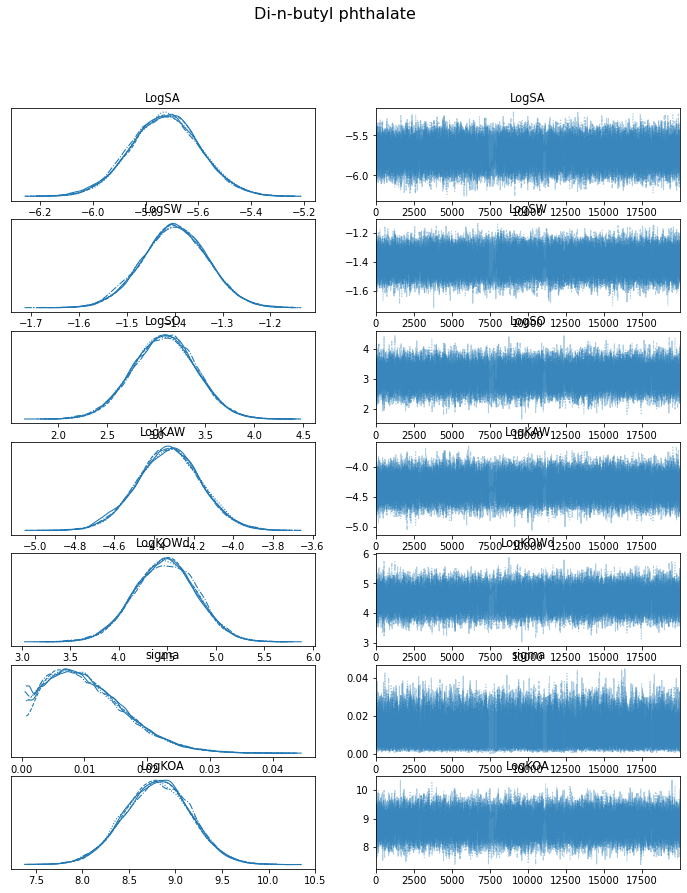

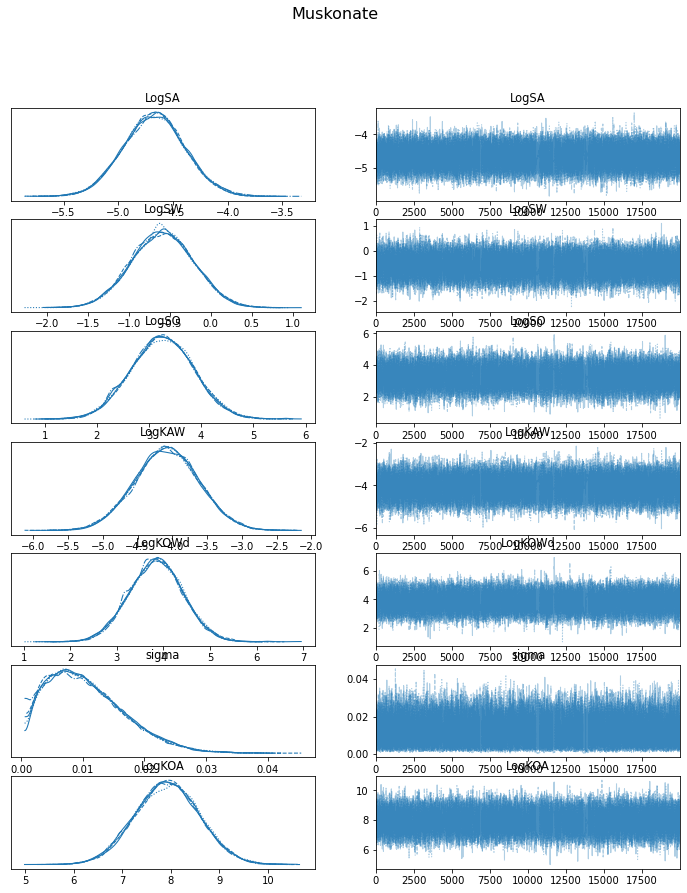

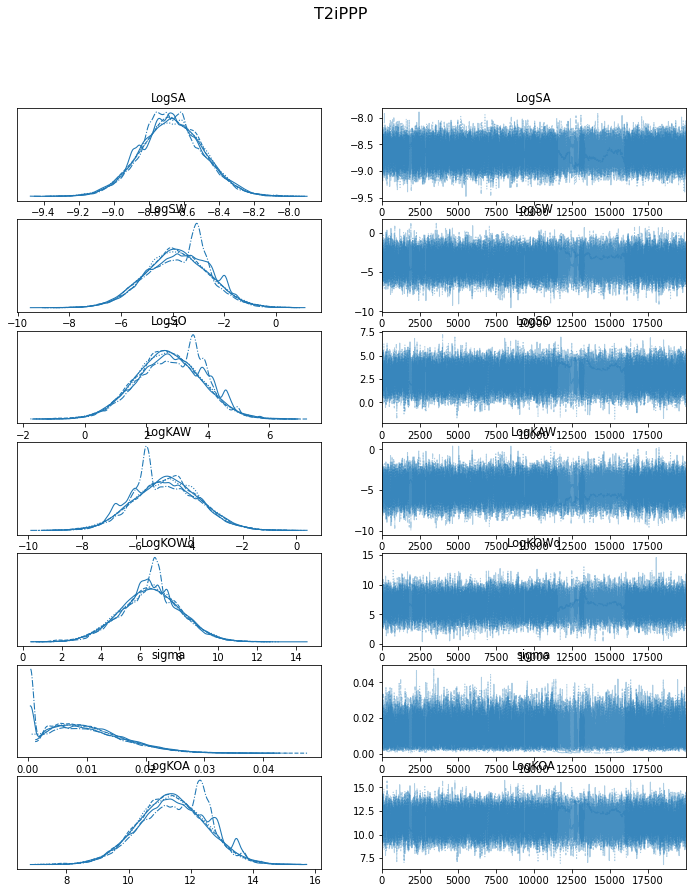

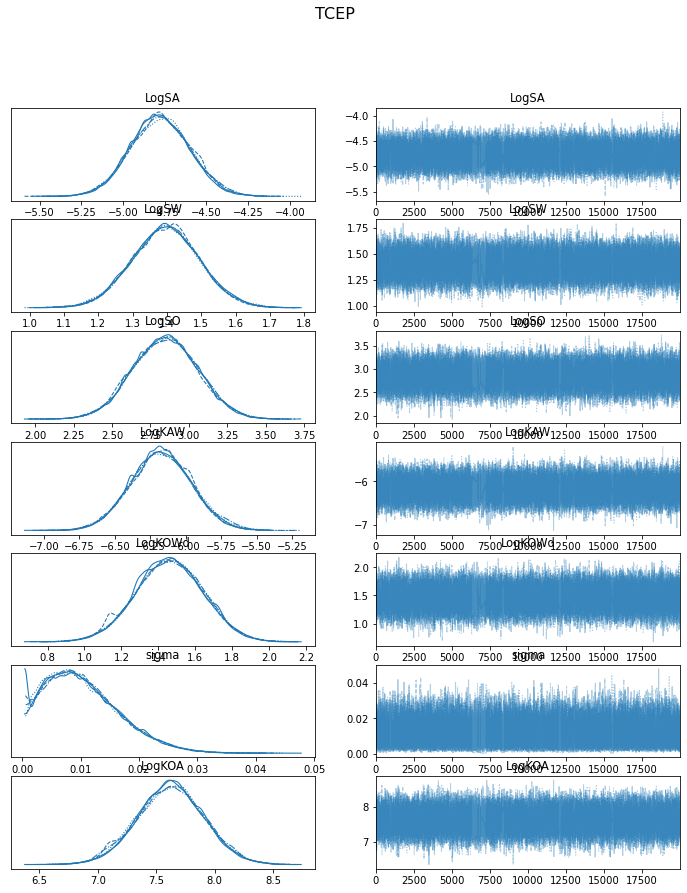

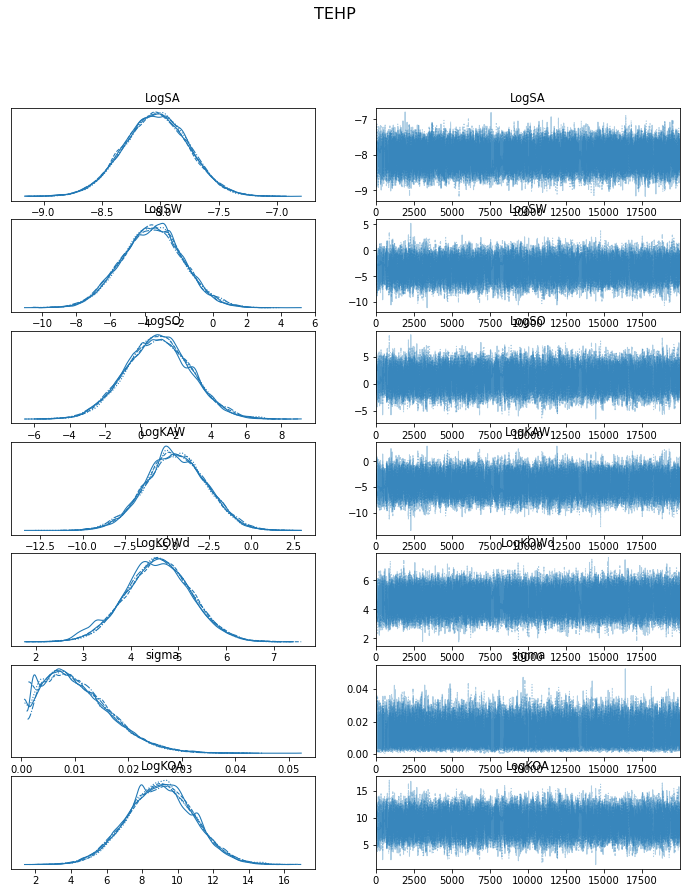

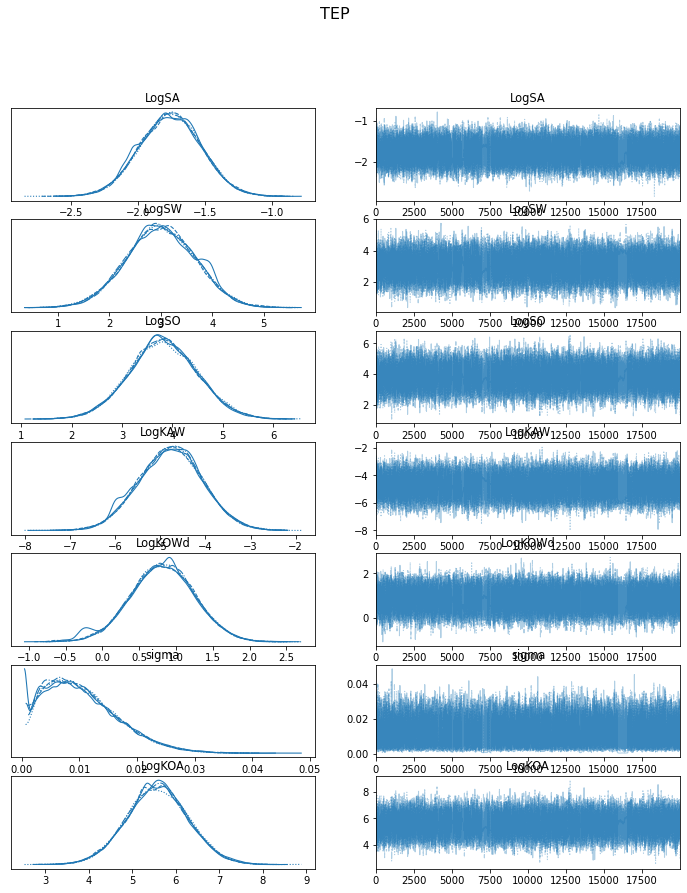

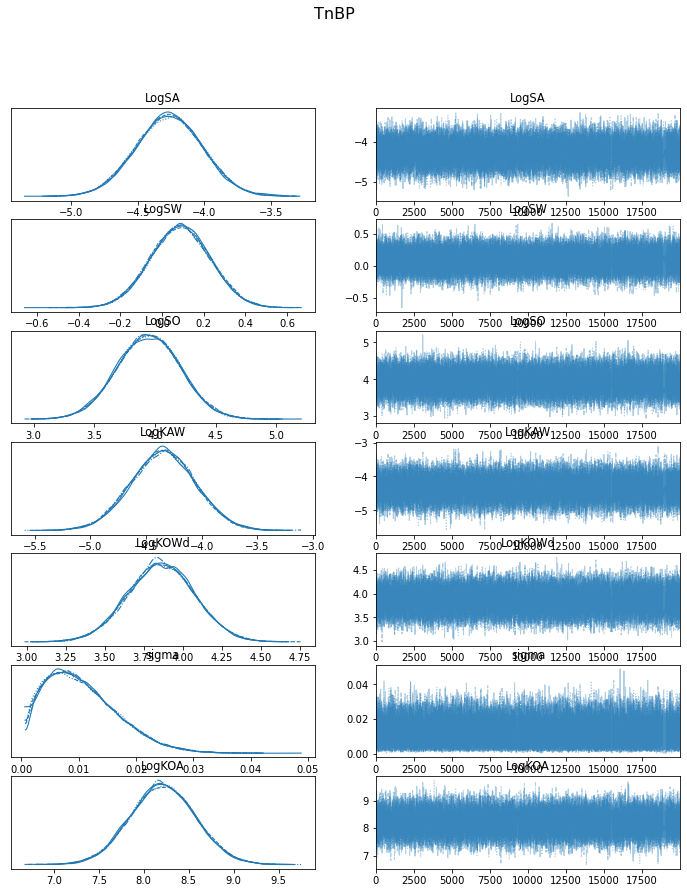

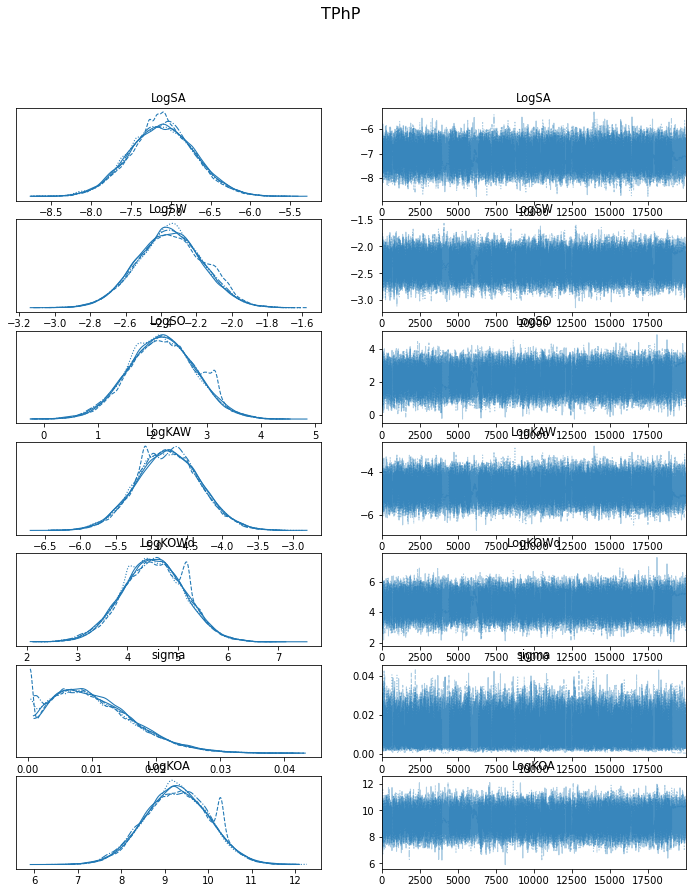

In [20]:
#Check the traceplots
directory = 'Traces/FAVRs/KS/noKoa/loopdir/'
InteractiveShell.ast_node_interactivity = "all"
#Loop through all the files in the directory and display plots. You may want to change the directory to a
#sub-folder if you are running lots of compounds. This may take ~minutes for lots of plots
tracesumms = {}
for filename in os.listdir(directory):
    #Define the compound from the filename
    #pdb.set_trace()
    comp = filename[0:filename.find("_")]    
    if comp == "benzokfluoranthene": #Error from the square brackets in loading files
        comp = "benzo[k]fluoranthene"
    elif comp == "benzoapyrene":
        comp = "benzo[a]pyrene"
    try: 
        #pdb.set_trace()
        fig, tracesumm = fmf.plot_trace(comp,FAVRs,filename=directory+filename,uDV=uCDV,model_type = 'KS',fig=True)
        #Put it in the FAV dataframe at the same time, just in case the kernel was reloaded at some point.
        FAVRs = fmf.trace_to_FAVs(comp,FAVRs,filename = directory+filename,uDV=uCDV,model_type='KS')
        #Print the compound name and the traceplot summary tables
        #comp       
        tracesumms[comp] = tracesumm
    except KeyError:
        #Subfolders in the directory will return a keyerror.
        pass
tracesummdf = pd.concat(tracesumms,keys = tracesumms.keys());
#tracesummdf
#comps = ['TPPO', 'TpCP','TEHP', 'T2iPPP']
comps = ['Muskonate',"o,p'-DDD",'Octinoxate','TBP-AE','Dimethyl phthalate','Diethyl phthalate','Di-n-butyl phthalate',
         'Bis(2-ethylhexyl) phthalate','Homosolate','Di-n-octyl phthalate','TEP','TPhP','TCEP','Benzylbutyl phthalate',
         'TnBP','TCiPP','TDCiPP','TEHP','EHDPP','TpCP','ToCP','TmCP','TPPO','T2iPPP','TBOEP']
comps = ['T2iPPP','TPhP']